<a href="https://colab.research.google.com/github/WanjaWhoopie/Mask-detection/blob/main/COVID_mask_detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 189 kB 46.7 MB/s 
     |████████████████████████████████| 1.2 MB 40.6 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 51 kB 286 kB/s 
Mounted at /content/gdrive


# Imports

In [ ]:
import pandas as pd
from google_drive_downloader import GoogleDriveDownloader as gdd
from tqdm import tqdm

from fastai.vision.all import *

In [ ]:
# Checking fastai version.

import fastai
fastai.__version__

'2.5.3'

# Dataset

from here: https://github.com/JadHADDAD92/covid-mask-detector

In [ ]:
# download dataset from link provided by
# https://github.com/X-zhangyang/Real-World-Masked-Face-Dataset
datasetPath = Path('covid-mask-detector/data/mask.zip')
gdd.download_file_from_google_drive(file_id='1UlOk6EtiaXTHylRUx2mySgvJX9ycoeBp',
                                    dest_path=str(datasetPath),
                                    unzip=True)
# delete zip file
datasetPath.unlink()

datasetPath = Path('covid-mask-detector/data/self-built-masked-face-recognition-dataset')
maskPath = datasetPath/'AFDB_masked_face_dataset'
nonMaskPath = datasetPath/'AFDB_face_dataset'
maskDF = pd.DataFrame()

for subject in tqdm(list(maskPath.iterdir()), desc='mask photos'):
    for imgPath in subject.iterdir():
        maskDF = maskDF.append({
            'image': str(imgPath),
            'mask': 1
        }, ignore_index=True)

for subject in tqdm(list(nonMaskPath.iterdir()), desc='non mask photos'):
    for imgPath in subject.iterdir():
        maskDF = maskDF.append({
            'image': str(imgPath),
            'mask': 0
        }, ignore_index=True)

dfName = 'covid-mask-detector/data/mask_df.csv'
print(f'saving Dataframe to: {dfName}')
maskDF.to_csv(dfName)

Unzipping...Done.


non mask photos: 100%|██████████| 460/460 [05:33<00:00,  1.38it/s]


saving Dataframe to: covid-mask-detector/data/mask_df.csv


In [ ]:
Path.BASE_PATH = datasetPath

In [ ]:
datasetPath.ls()

(#3) [Path('AFDB_masked_face_dataset'),Path('AFDB_face_dataset'),Path('Readme.docx')]

In [ ]:
(datasetPath/'AFDB_face_dataset').ls()

(#460) [Path('AFDB_face_dataset/qiyu'),Path('AFDB_face_dataset/xiongnaijin'),Path('AFDB_face_dataset/liyitong'),Path('AFDB_face_dataset/maolinlin'),Path('AFDB_face_dataset/zhangxueying'),Path('AFDB_face_dataset/wuyifan'),Path('AFDB_face_dataset/zhangxueyou'),Path('AFDB_face_dataset/tanlina'),Path('AFDB_face_dataset/wangjie'),Path('AFDB_face_dataset/xiaozhan')...]

In [ ]:
files = get_image_files(datasetPath)

In [ ]:
files

(#92671) [Path('AFDB_masked_face_dataset/jinlaiyuan/0_1_20.jpg'),Path('AFDB_masked_face_dataset/xiongnaijin/0_0_1.jpg'),Path('AFDB_masked_face_dataset/xiongnaijin/0_0_2.jpg'),Path('AFDB_masked_face_dataset/xiongnaijin/1_0_0.jpg'),Path('AFDB_masked_face_dataset/xiongnaijin/0_1_1.jpg'),Path('AFDB_masked_face_dataset/xiongnaijin/1_1_2.jpg'),Path('AFDB_masked_face_dataset/liyitong/0_0_9.jpg'),Path('AFDB_masked_face_dataset/liyitong/0_1_14.jpg'),Path('AFDB_masked_face_dataset/liyitong/0_0_6.jpg'),Path('AFDB_masked_face_dataset/liyitong/1_0_7.jpg')...]

In [ ]:
len(files)

92671

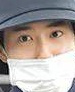

In [ ]:
im = Image.open(files[0])
im

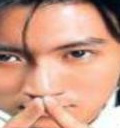

In [ ]:
im = Image.open(files[10000])
im

In [ ]:
files[0].parent.parent.name

'AFDB_masked_face_dataset'

In [ ]:
def label_func(f):
  if f.parent.parent.name == 'AFDB_masked_face_dataset':
    return 'Mask'
  else:
    return 'No Mask'

In [ ]:
label_func(files[0])

'Mask'

In [ ]:
label_func(files[92670])

'No Mask'

In [ ]:
mask = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=label_func,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

In [ ]:
mask.summary(datasetPath)

Setting-up type transforms pipelines
Found 92671 items
2 datasets of sizes 74137,18534
Setting up Pipeline: PILBase.create
Setting up Pipeline: label_func -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      covid-mask-detector/data/self-built-masked-face-recognition-dataset/AFDB_face_dataset/sunhonglei/0_0_sunhonglei_0079.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=155x137
  Pipeline: label_func -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      covid-mask-detector/data/self-built-masked-face-recognition-dataset/AFDB_face_dataset/sunhonglei/0_0_sunhonglei_0079.jpg
    applying label_func gives
      No Mask
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=155x137, TensorCategory(1))


Found 92671 items
2 datasets of sizes 74137,18534
Setting up Pipelin

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)



Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -- {'size': (460, 460), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
    starting from
      (PILImage mode=RGB size=155x137, TensorCategory(1))
    applying Resize -- {'size': (460, 460), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} gives
      (PILImage mode=RGB size=460x460, TensorCategory(1))
    applying ToTensor gives
      (TensorImage of size 3x460x460, TensorCategory(1))

Adding the next 3 samples

No before_batch transform to apply

Collating items in a batch

Applying batch_tfms to the batch built
  Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': 224, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}
    starting from
      (TensorImage of size 4x3x460x460, TensorCa

In [ ]:
dls = mask.dataloaders(datasetPath)

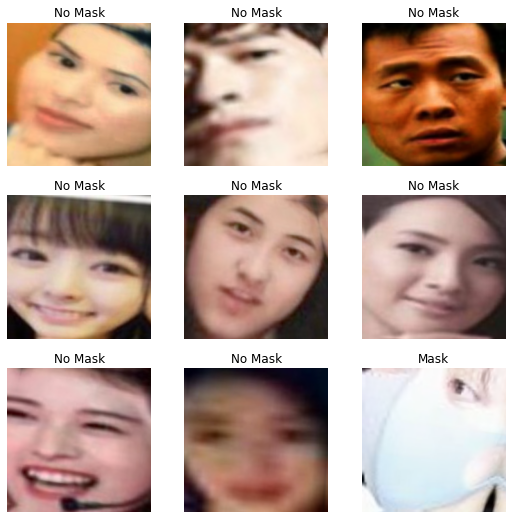

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.009120108559727669)

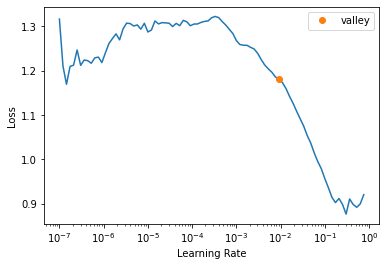

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(3, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.018799,0.007898,0.001996,0.998004,20:11


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.011306,0.006187,0.001187,0.998813,27:26
1,0.006075,0.003653,0.001295,0.998705,27:32
2,0.001312,0.002116,0.000432,0.999568,27:33


In [ ]:
learn.export('export.pkl')
!cp mask_detector.pkl gdrive/MyDrive/Models/COVID/

## Inference

In [ ]:
# learn = learn.load('/content/gdrive/MyDrive/Models/export.pkl')
learn = load_learner('/content/gdrive/MyDrive/Models/export.pkl')

In [ ]:
im = Image.open("with-mask.jpeg")

In [ ]:
learn.predict("with-mask.jpeg")[0]